In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split

In [2]:
data = []
labels = []
classes = 43
cur_path = 'C:/Users/s9174/Desktop/Traffic sign classifier'

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)

In [5]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]),
tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(rate=0.25),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(rate=0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Dense(43, activation='softmax')])

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 106s 3ms/sample - loss: 2.1151 - accuracy: 0.4806 - val_loss: 0.6439 - val_accuracy: 0.8383
Epoch 2/20
31367/31367 [==============================] - 97s 3ms/sample - loss: 0.8813 - accuracy: 0.7398 - val_loss: 0.3215 - val_accuracy: 0.9109
Epoch 3/20
31367/31367 [==============================] - 96s 3ms/sample - loss: 0.6160 - accuracy: 0.8193 - val_loss: 0.1999 - val_accuracy: 0.9413
Epoch 4/20
31367/31367 [==============================] - 98s 3ms/sample - loss: 0.4894 - accuracy: 0.8533 - val_loss: 0.1490 - val_accuracy: 0.9546
Epoch 5/20
31367/31367 [==============================] - 100s 3ms/sample - loss: 0.3952 - accuracy: 0.8833 - val_loss: 0.1746 - val_accuracy: 0.9478
Epoch 6/20
31367/31367 [==============================] - 99s 3ms/sample - loss: 0.3466 - accuracy: 0.8975 - val_loss: 0.1458 - val_accuracy: 0.9574
Epoch 7/20
31367/31367 [==============================]

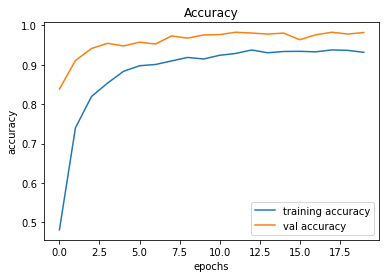

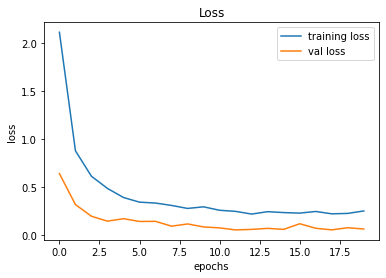

In [7]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('C:/Users/s9174/Desktop/Traffic sign classifier/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
p='C:/Users/s9174/Desktop/Traffic sign classifier'
for img in imgs:
    img=os.path.join(p,img)
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9323832145684877
